# **Support Vector Machines(SVM) on IoT Combined Dataset**

****Importing libraries****

In [2]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [3]:
#uploaded = files.upload()

**Importing the Dataset**

In [4]:
dataset=pd.read_csv('F:/Shawon/Research Collaberation/Combined Dataset/Dataset without ts date and time columns/New_Combined_IoT_dataset.csv')

**Exploratory Data Analysis**

In [5]:
dataset.shape

(401119, 18)

In [6]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [7]:
dataset.describe()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
count,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000,401119.000000
mean,0.495814,0.499228,0.489808,0.499600,0.348607,0.014956,0.443426,0.466050,0.019505,0.055719,0.019549,0.055719,0.532697,0.630788,0.232030,0.515327,0.984431,0.389209
std,0.102871,0.103558,0.103076,0.102747,0.087049,0.121376,0.108273,0.110507,0.058818,0.229379,0.059530,0.229379,0.043685,0.157665,0.149059,0.108775,0.123801,0.487571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.495216,0.499092,0.488897,0.499405,0.344399,0.000000,0.438462,0.462511,0.008217,0.000000,0.008112,0.000000,0.533556,0.666667,0.200000,0.517307,1.000000,0.000000
50%,0.495216,0.499092,0.488897,0.499405,0.344399,0.000000,0.438462,0.462511,0.008217,0.000000,0.008112,0.000000,0.533556,0.666667,0.200000,0.517307,1.000000,0.000000
75%,0.495216,0.499092,0.488897,0.499405,0.344399,0.000000,0.438462,0.462511,0.008217,0.000000,0.008112,0.000000,0.533556,0.666667,0.200000,0.517307,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Histograms**

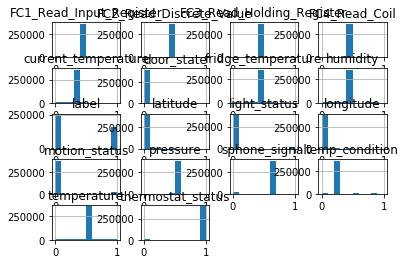

<Figure size 576x576 with 0 Axes>

In [8]:
dataset.hist()
plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')
plt.show()

**Density Plots**

**Correlations**

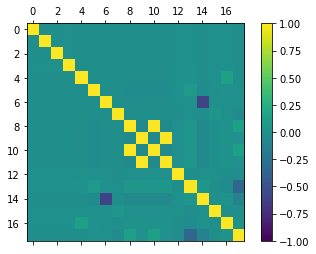

In [9]:
correlations=dataset.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)

In [10]:
X = dataset.drop('label', axis=1)
y = dataset['label']

In [11]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

In [14]:
# let us check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Training the Algorithm**

In [15]:
#Calculate start time
start = timeit.default_timer()

#Create a svm Classifier
svclassifier = SVC(kernel='linear')

#Train the model using the training sets
svclassifier.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

**Making Predictions**

In [16]:
#Calculate start time
start = timeit.default_timer()

#Print the label 0 as normal & 1 as attack
#Predict the response for test dataset
y_pred = svclassifier.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [17]:
#for i in y_pred:
#   print(i, end = ' ')

**Evaluating the Algorithm**

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[71724  1776]
 [35514 11322]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     73500
           1       0.86      0.24      0.38     46836

    accuracy                           0.69    120336
   macro avg       0.77      0.61      0.59    120336
weighted avg       0.74      0.69      0.63    120336



In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6901176705225369
Precision: 0.7449505279435447
Recall: 0.6901176705225369
F1 Score: 0.6318208687917952
Mean Absolute Error: 0.3098823294774631
Cohens kappa: 0.25027518010098826
ROC AUC: 0.6087869299910588
Train Time(s):  4045.8253581
Test Time(s):  464.6566743000003


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

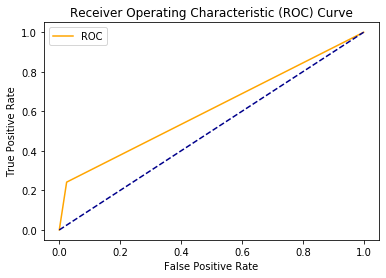

In [21]:
plot_roc_curve(fpr, tpr)

In [22]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-SVM-Simple_Result.csv')

# **Implementing Kernel SVM with Scikit-Learn**

**Training the Algorithm**

**1. Polynomial Kernel**

In [23]:
#Calculate start time
start = timeit.default_timer()

#Create a svm polynomial kernel Classifier
svclassifier = SVC(kernel='poly', degree=8)

#Train the model using the training sets
svclassifier.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

**Making Predictions**

In [24]:
#Calculate start time
start = timeit.default_timer()

#Print the label 0 as normal & 1 as attack
#Predict the response for test dataset
y_pred = svclassifier.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [25]:
#for i in y_pred:
#   print(i, end = ' ')

**Evaluating the Algorithm**

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[73500     0]
 [46836     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     73500
           1       0.00      0.00      0.00     46836

    accuracy                           0.61    120336
   macro avg       0.31      0.50      0.38    120336
weighted avg       0.37      0.61      0.46    120336



In [27]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6107897885919426
Precision: 0.6107897885919426
Recall: 1.0
F1 Score: 0.7583730576363524
Mean Absolute Error: 0.38921021140805745
Cohens kappa: 0.0
ROC AUC: 0.5
Train Time(s):  5385.7126532
Test Time(s):  701.7707145000004


In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

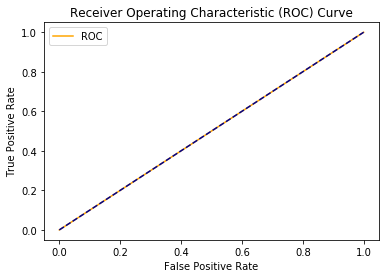

In [29]:
plot_roc_curve(fpr, tpr)

In [30]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-SVM-Polynomial_Kernel_Result.csv')

**Training the Algorithm**

**2. Gaussian Kernel**

In [31]:
#Calculate start time
start = timeit.default_timer()

#Create a svm polynomial kernel Classifier
svclassifier = SVC(kernel='rbf')

#Train the model using the training sets
svclassifier.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

**Making Predictions**

In [32]:
#Calculate start time
start = timeit.default_timer()

#Print the label 0 as normal & 1 as attack
#Predict the response for test dataset
y_pred = svclassifier.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [33]:
#for i in y_pred:
#   print(i, end = ' ')

**Evaluating the Algorithm**

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71620  1880]
 [31246 15590]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     73500
           1       0.89      0.33      0.48     46836

    accuracy                           0.72    120336
   macro avg       0.79      0.65      0.65    120336
weighted avg       0.77      0.72      0.68    120336



In [35]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.7247207818109294
Precision: 0.7725858165872866
Recall: 0.7247207818109294
F1 Score: 0.684784053687923
Mean Absolute Error: 0.2752792181890706
Cohens kappa: 0.34671735407338056
ROC AUC: 0.6536426889484976
Train Time(s):  8871.2036348
Test Time(s):  784.2366806000027


In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

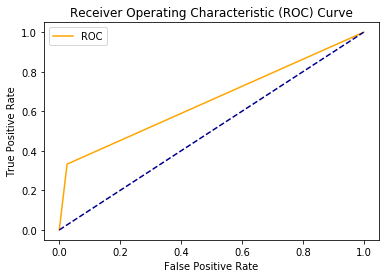

In [37]:
plot_roc_curve(fpr, tpr)

In [38]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-SVM-Gaussian_Kernel_Result.csv')

**Training the Algorithm**

**3. Sigmoid Kernel**

In [39]:
#Calculate start time
start = timeit.default_timer()

#Create a svm polynomial kernel Classifier
svclassifier = SVC(kernel='sigmoid')

#Train the model using the training sets
svclassifier.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

**Making Predictions**

In [40]:
#Calculate start time
start = timeit.default_timer()

#Print the label 0 as normal & 1 as attack
#Predict the response for test dataset
y_pred = svclassifier.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [41]:
#for i in y_pred:
#   print(i, end = ' ')

**Evaluating the Algorithm**

In [42]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71708  1792]
 [35682 11154]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     73500
           1       0.86      0.24      0.37     46836

    accuracy                           0.69    120336
   macro avg       0.76      0.61      0.58    120336
weighted avg       0.74      0.69      0.63    120336



In [43]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred)))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred)))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.6885886185347693
Precision: 0.7431806614493486
Recall: 0.6885886185347693
F1 Score: 0.6294918291029338
Mean Absolute Error: 0.3114113814652307
Cohens kappa: 0.24606528939982064
ROC AUC: 0.6068845942681453
Train Time(s):  5847.965583100002
Test Time(s):  805.9627051999996


In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

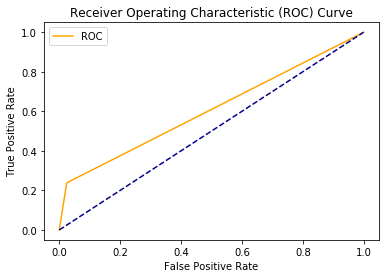

In [45]:
plot_roc_curve(fpr, tpr)

In [46]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-SVM-Sigmoid_Kernel_Result.csv')